# Dataset Breast Cancer

---
## Setup Library dan Dataset

In [14]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
494,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.1780,0.2878,0.31860,0.14160,0.2660,0.09270
134,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.06847,0.1692,0.05727,...,22.52,31.39,145.60,1590.0,0.1465,0.2275,0.39650,0.13790,0.3109,0.07610
49,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.22820,0.12820,0.2871,0.06917
136,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343


---
## Preprocessing and Pipelining

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---
## Create model

In [16]:
import sklearn.linear_model as lm
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn import tree
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define model
modelDTL = tree.DecisionTreeClassifier(random_state=0)
modelID3 = Id3Estimator()
modelKmeans = KMeans(n_clusters=2, random_state=0)
modelLogistic = LogisticRegression(random_state=0)
modelNeural = MLPClassifier(random_state=1, max_iter=300)
modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDTL)
                     ])


---
## Fitting and predict

### Decision Tree Learning

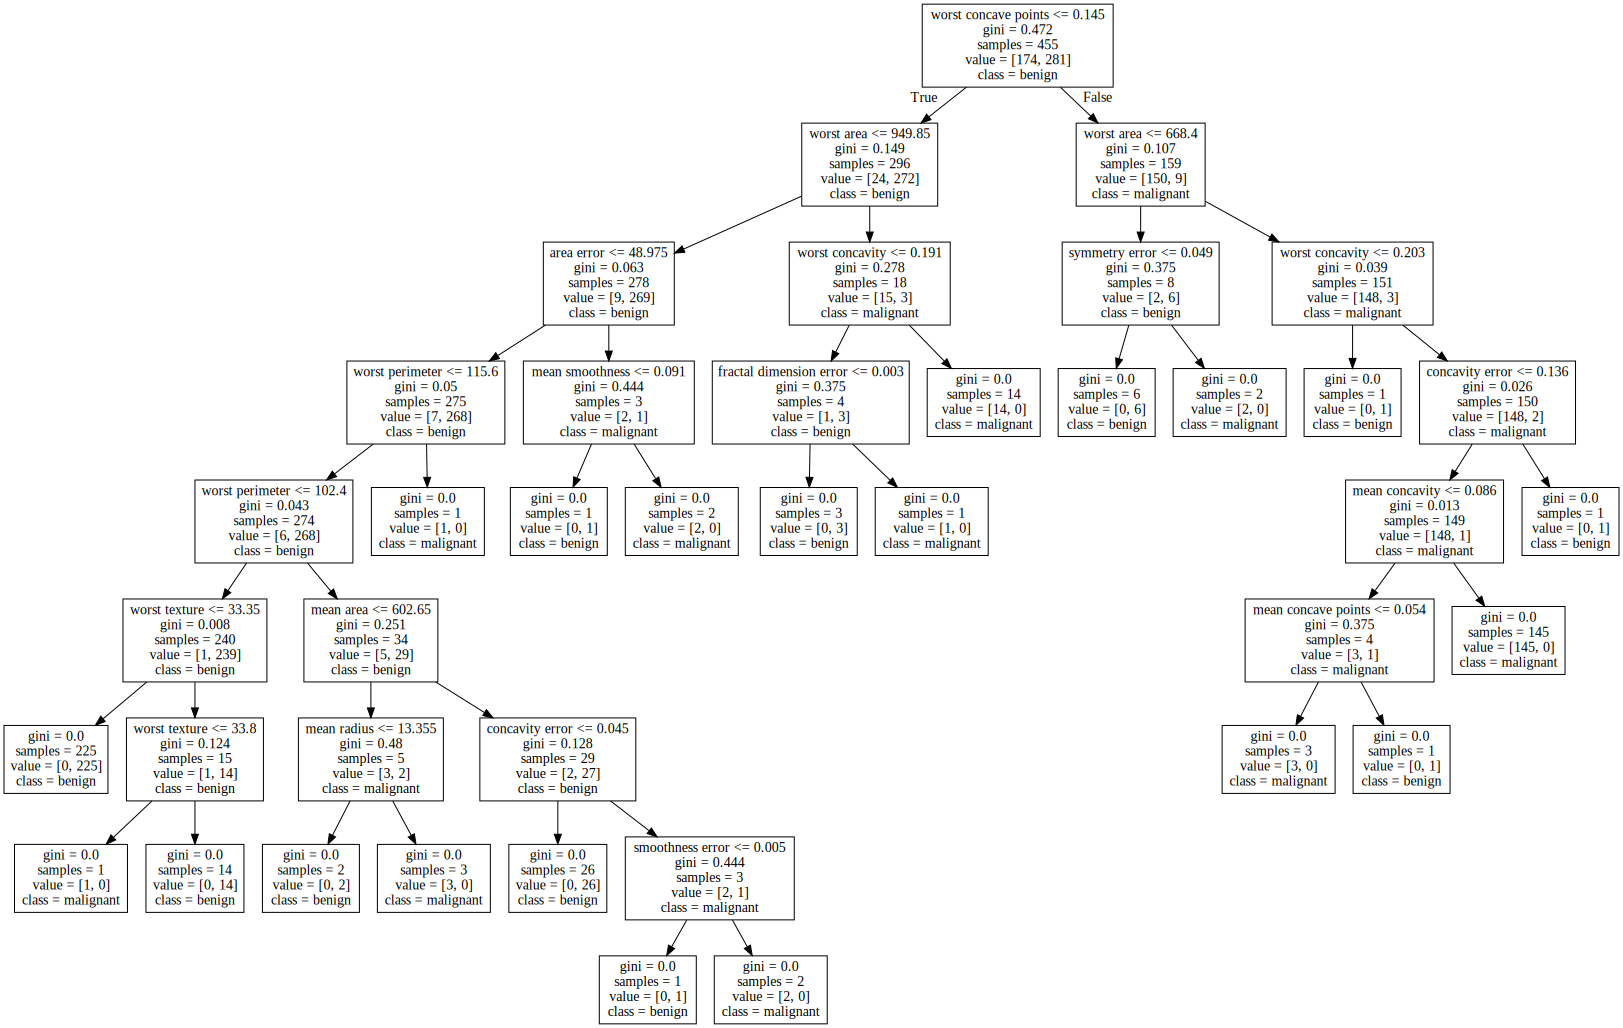

In [17]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_dataDTL = tree.export_graphviz(modelDTL, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graphDTL = graphviz.Source(dot_dataDTL)

# Preprocessing of validation data, get predictions
predsDTL = clf.predict(X_valid_full)

graphDTL

### ID3 Estimator

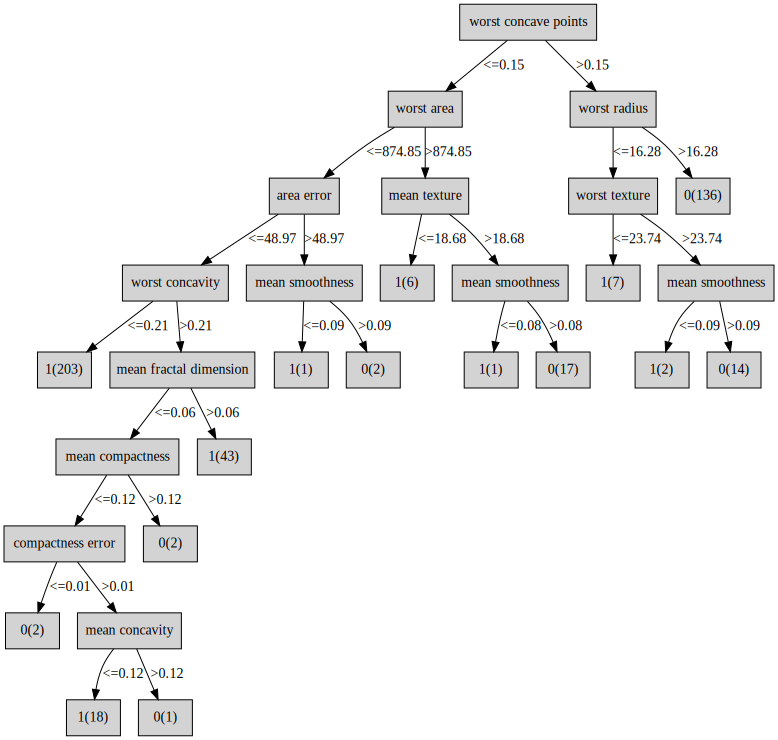

In [18]:
import graphviz
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modelID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=[d for d in data.feature_names], 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modelID3.predict(X_valid_full)

graphID3

### KMeans

In [19]:
modelKmeans.fit(X_train_full, y_train)

predsKmeans = modelKmeans.predict(X_valid_full)

### Logistic Regression

In [20]:
modelLogistic.fit(X_train_full, y_train)

predsLogistic = modelLogistic.predict(X_valid_full)

C:\Python 36-64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Neural Network

In [21]:
modelNeural.fit(X_train_full, y_train)

predsNeural = modelNeural.predict(X_valid_full)

### SVM

In [22]:
modelSVM.fit(X_train_full, y_train)

predsSVM = modelSVM.predict(X_valid_full)

### Accuracy and F1 Score

In [23]:
from sklearn.metrics import accuracy_score, f1_score

# Decision Tree Learning
accuracyDTL = accuracy_score(y_valid, predsDTL)
f1DTL = f1_score(y_valid, predsDTL)

# ID3 Estimator
accuracyID3 = accuracy_score(y_valid, predsID3)
f1ID3 = f1_score(y_valid, predsID3)

# KMeans
accuracyKmeans = accuracy_score(y_valid, predsKmeans)
f1Kmeans = f1_score(y_valid, predsKmeans)

# Logistic Regression
accuracyLogistic = accuracy_score(y_valid, predsLogistic)
f1Logistic = f1_score(y_valid, predsLogistic)

# Neural Network
accuracyNeural = accuracy_score(y_valid, predsNeural)
f1Neural = f1_score(y_valid, predsNeural)

# SVM
accuracySVM = accuracy_score(y_valid, predsSVM)
f1SVM = f1_score(y_valid, predsSVM)

# All Model
accuracyAll = [accuracyDTL, accuracyID3, accuracyKmeans, accuracyLogistic, accuracyNeural, accuracySVM]
f1All = [f1DTL, f1ID3, f1Kmeans, f1Logistic, f1Neural, f1SVM]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['Decision Tree', 'ID3', 'KMeans', 'Logistic', 'Neural Network', 'SVM'])
allScore

,accuracy,f1
Decision Tree,0.903509,0.929032
ID3,0.921053,0.943396
KMeans,0.131579,0.000000
Logistic,0.956140,0.967320
Neural Network,0.921053,0.941935
SVM,0.982456,0.986842


---
# Dataset Play Tennis

---
## Setup Library dan Dataset

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

full_data_X = pd.read_csv('PlayTennis.csv')
full_data_X.dropna(axis=0, subset=['Play Tennis'], inplace=True)
full_data_Y = full_data_X['Play Tennis']
full_data_X.drop(['Play Tennis'], axis=1, inplace=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

full_data_X.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


---
## Preprocessing and Pipelining

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---
## Create model

In [26]:
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define model
modelDtl = tree.DecisionTreeClassifier(random_state=0)
modelID3 = Id3Estimator()
kmeans = KMeans(n_clusters=2, random_state=0)
modelLogistic = LogisticRegression(random_state=0, max_iter=100)
modelNeural = MLPClassifier(random_state=0, max_iter=300)
modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0))

# Bundle preprocessing and modeling code in a pipeline
dtl = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDtl)
                     ])

modID3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelID3)
                     ])

modelKmeans = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', kmeans)
                     ])

modlogistic = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelLogistic)
                     ])

modNeural = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelNeural)
                     ])

modSVM = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelSVM)
                     ])

---
## Fitting and predict

### Decision Tree Learning

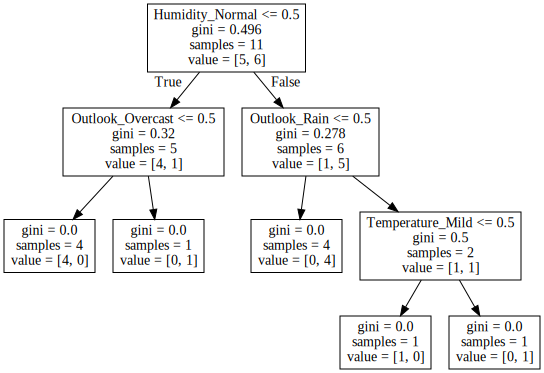

In [27]:
import graphviz
# Preprocessing of training data, fit model 
dtl.fit(X_train_full, y_train)
#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_data = tree.export_graphviz(modelDtl, 
                  feature_names=dtl.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(X_train_full.columns))
graph = graphviz.Source(dot_data)

# Preprocessing of validation data, get predictions
predsDtl = dtl.predict(X_valid_full)
graph

### ID3 Estimator

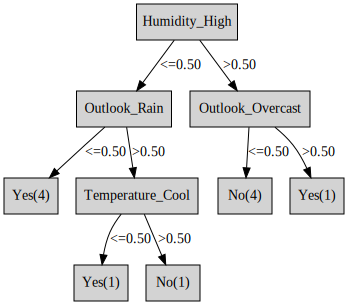

In [28]:
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=dtl.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(X_train_full.columns), 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modID3.predict(X_valid_full)

graphID3

### KMeans

In [29]:
modelKmeans.fit(X_train_full, y_train)

predsKmeans = ['Yes' if item==1 else 'No' for item in modelKmeans.predict(X_valid_full)]
predsKmeans

['No', 'Yes', 'Yes']

### Logistic Regression

In [30]:
modlogistic.fit(X_train_full, y_train)

predsLogistic = modlogistic.predict(X_valid_full)
predsLogistic

array(['No', 'No', 'Yes'], dtype=object)

### Neural Network

In [31]:
modNeural.fit(X_train_full, y_train)
predsNeural = modNeural.predict(X_valid_full)
predsNeural

C:\Python 36-64\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array(['No', 'Yes', 'Yes'], dtype='<U3')

### SVM

In [32]:
modSVM.fit(X_train_full, y_train)
predsSVM = modSVM.predict(X_valid_full)
predsSVM

array(['No', 'Yes', 'Yes'], dtype=object)

---
## Accuracy and F1 Score

In [33]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = [accuracy_score(y_valid, predsDtl),accuracy_score(y_valid, predsID3),accuracy_score(y_valid, predsKmeans),accuracy_score(y_valid, predsLogistic),accuracy_score(y_valid, predsNeural),accuracy_score(y_valid, predsSVM)]
f1 = [f1_score(y_valid, predsDtl, pos_label='Yes'), f1_score(y_valid, predsID3, pos_label='Yes'), f1_score(y_valid, predsKmeans, pos_label='Yes'), f1_score(y_valid, predsLogistic, pos_label='Yes'), f1_score(y_valid, predsNeural, pos_label='Yes'), f1_score(y_valid, predsSVM, pos_label='Yes')]
score_data = {'accuracy': accuracy, 'f1': f1}
score = pd.DataFrame(data = score_data, index=['Decision Tree Learning', 'ID3 Estimator', 'K-Means', 'Logistic Regression', 'Neural Network', 'SVM'])
score

,accuracy,f1
Decision Tree Learning,0.333333,0.5
ID3 Estimator,0.333333,0.5
K-Means,0.666667,0.8
Logistic Regression,0.333333,0.5
Neural Network,0.666667,0.8
SVM,0.666667,0.8
